<a href="https://colab.research.google.com/github/seina001/QLC240_Spring2025/blob/main/Exercise12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 9: Importing and initial visualization of data that we will be modeling

The following exercises will be organized into 4 sections:
    1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
    2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
    3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
    4. Analysis of the best fit models from sections 2 and 3, to see if using data from the same geographic area results in a better model.

In [5]:
#Import packages needed to run code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Import the JMA dataset and visualize to see what we have.
IMport nitrate file as a pandas dataset.

In [6]:
infile = 'jma_nitrate.csv'
#######
jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualizing the data variable, if that is what you called it, example:
data = jma_df

Plotting a scater plot of nitrate and depth data from JMA cruise.
You might want to invert the axis, to make it look like an ocean water column.

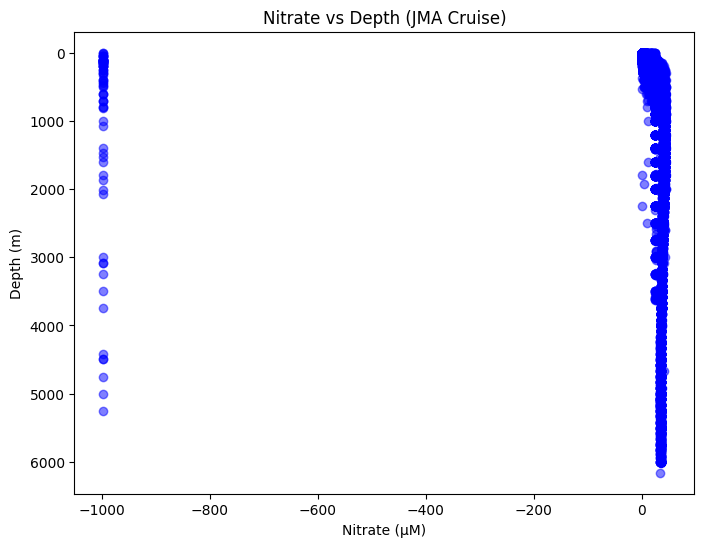

In [7]:
# Scatter plot of Nitrate vs Depth for JMA data
plt.figure(figsize=(8, 6))

plt.scatter(jma_df["nitrate"], jma_df["depth"], alpha=0.5, color="blue")

# Invert the y-axis to resemble an ocean water column
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("Nitrate (µM)")
plt.ylabel("Depth (m)")
plt.title("Nitrate vs Depth (JMA Cruise)")

plt.show()

The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

In [8]:
#Example:
# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
#Plot the corrected data in a scatter plot again.

The following cell will read in another file, and fix some date/time variables so they are managable. You don't need to change it at all, except you need to upload the .csv file itself.

In [9]:
# Reading in the Argo float data with no NO3 values
infile = 'kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))

# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
#data_BGC.head()

# Section 1, compare datasets (JMA, ARGO)

Compare the samples locations and see how the datasets overlap or don't overlap

In [10]:
#Plot the corrected data and the Argo float data "Latitude" and "Longitude" coordinates. If you're unsure of the column to choose, just look at the data and the column head names.
#Scatter plot for example

In [11]:
# Compare geographic coordinates
print("\nJMA Longitude:", jma_df["lon"].min(), "-", jma_df["lon"].max())
print("Argo Longitude:", data_BGC["LON"].min(), "-", data_BGC["LON"].max())

print("\nJMA Latitude:", jma_df["lat"].min(), "-", jma_df["lat"].max())
print("Argo Latitude:", data_BGC["LAT"].min(), "-", data_BGC["LAT"].max())


JMA Longitude: 133.990833333 - 170.035166667
Argo Longitude: 148.325 - 176.199

JMA Latitude: 0.332166666667 - 49.9915
Argo Latitude: 30.092 - 37.759


Just from the geographic extend, we can see that the distribution of JMA samples is considerably higher than that of BCG ARGO samples. However big this despair, for this and other variables, there is some overlap in the sampled region, depths, and seasons. The geographical extent overlaps in the region between the ~30 to ~40° of latitude and ~150 to ~175° of longitude.

In [12]:
# Compare  depth ranges
print("\nJMA Depth Range:", jma_df["depth"].min(), "-", jma_df["depth"].max())
print("Argo Depth Range:", data_BGC["DEPTH[M]"].min(), "-", data_BGC["DEPTH[M]"].max())



JMA Depth Range: 0 - 6161
Argo Depth Range: -990.493 - -4.061


Compare the water masses that were sampled in both datasets

In [13]:
#Plot a scatter plot looking at the temperature vs depth profile, and seperate plot looking at salinity vs temperature. Each data source should be labeled differently.

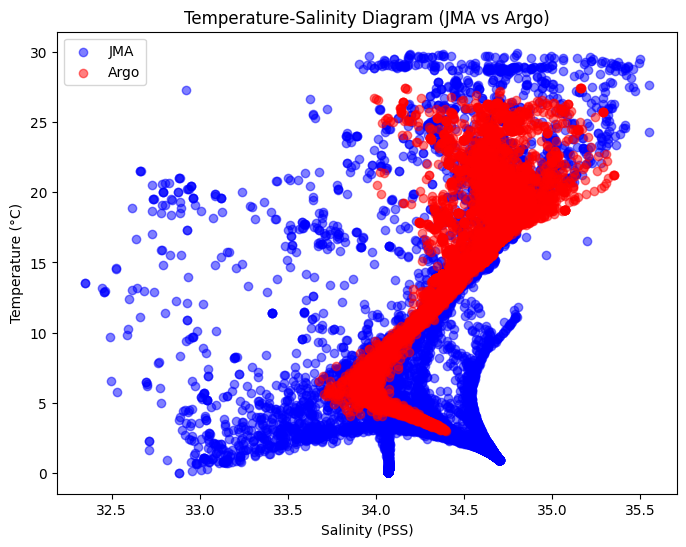

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter(jma_df["sal"], jma_df["theta"], alpha=0.5, label="JMA", color="blue")
plt.scatter(data_BGC["SALINITY[PSS]"], data_BGC["TEMPERATURE[C]"], alpha=0.5, label="Argo", color="red")

plt.xlabel("Salinity (PSS)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature-Salinity Diagram (JMA vs Argo)")
plt.legend()
plt.show()

# Section 2, model testing and best fit analysis using entire dataset
Start of model testing, and comparison to find the best fit model for this dataset using KNN.
We chose to use temperature and salinity as variables to model nitrate from. They are good proxies for water masses and can hopefully be used to predict nitrate.

In [23]:
#import the jma nitrate file, then get columns I want for training
infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile,sep=(','))
nitratefilefiltered = nitratefile[nitratefile.nitrate>0]
X = nitratefilefiltered[["sal","theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(X))
print(np.shape(y))


#split data set to train/test 20/80 split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=4)



(15574, 2)
(15574, 1)


In [24]:
# generate the data
import matplotlib.pyplot as plt
import random


# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

#run KNN with K neighbors ranging from 1-15, calculating
#r2 and RMSE to find the best fit model
results = []
for n in range(1,16,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    #print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    #print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    #print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    #print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)
results

[[1, 0.9999110613989356, 2.6058678198832435],
 [2, 0.9927289125889681, 2.4303135395420776],
 [3, 0.989436962483429, 2.320717656355632],
 [4, 0.9877493952444761, 2.294790385486795],
 [5, 0.9862445125445002, 2.265924014995549],
 [6, 0.9853651009567571, 2.2178185162292237],
 [7, 0.9846615070565908, 2.213675727092634],
 [8, 0.9840785865559012, 2.1952765454848047],
 [9, 0.9836823893549954, 2.20225936338761],
 [10, 0.9833161917430909, 2.1939401652725508],
 [11, 0.9830143132143836, 2.2023368473610616],
 [12, 0.98254256174158, 2.2144196381599355],
 [13, 0.9820371954017075, 2.2041353557622165],
 [14, 0.9816750176585883, 2.208859357144669],
 [15, 0.9812961480610605, 2.2152382383662066]]

In [25]:
myarray = np.asarray(results)
myarray

array([[ 1.        ,  0.99991106,  2.60586782],
       [ 2.        ,  0.99272891,  2.43031354],
       [ 3.        ,  0.98943696,  2.32071766],
       [ 4.        ,  0.9877494 ,  2.29479039],
       [ 5.        ,  0.98624451,  2.26592401],
       [ 6.        ,  0.9853651 ,  2.21781852],
       [ 7.        ,  0.98466151,  2.21367573],
       [ 8.        ,  0.98407859,  2.19527655],
       [ 9.        ,  0.98368239,  2.20225936],
       [10.        ,  0.98331619,  2.19394017],
       [11.        ,  0.98301431,  2.20233685],
       [12.        ,  0.98254256,  2.21441964],
       [13.        ,  0.9820372 ,  2.20413536],
       [14.        ,  0.98167502,  2.20885936],
       [15.        ,  0.98129615,  2.21523824]])

In [26]:
#Make list into array to plot nicely, in order to look at all of the
#results

myarray = np.asarray(results)

#make a dataframe with each column named for ploting
data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
data


,Kneighbors,AccScore,RMSE
0,1.0,0.999911,2.605868
1,2.0,0.992729,2.430314
2,3.0,0.989437,2.320718
3,4.0,0.987749,2.294790
4,5.0,0.986245,2.265924
5,6.0,0.985365,2.217819
6,7.0,0.984662,2.213676
7,8.0,0.984079,2.195277
8,9.0,0.983682,2.202259
9,10.0,0.983316,2.193940


Looking at the table above we see that the best fit model is using 10 K neighbors. The accuracy is high and RMSE is lowest.

In [27]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=13)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (13))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))



Neighbors = 13

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.2041353557622165 



The next two plots show the predicted nitrate vs salinity (and then temperature). Both training and test datasets are plotted. We can see here that the predicted variables do align with the general test data sets and their aren't many outliers. Meaning there doesn't seem to be overtraining on any specific data points.

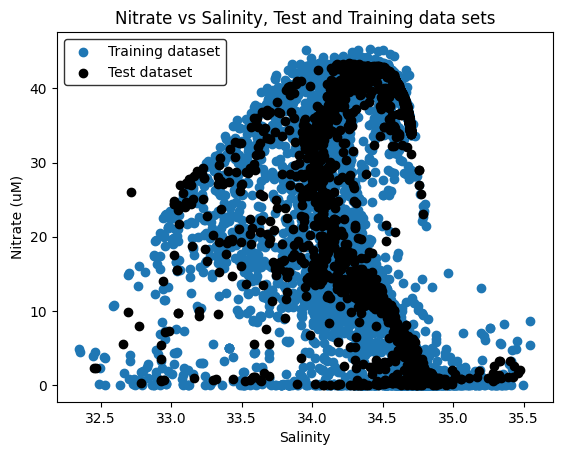

In [28]:
#Plot salinity vs. nitrate predicted
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')
plt.xlabel('Salinity')
plt.ylabel('Nitrate (uM)')
plt.title('Nitrate vs Salinity, Test and Training data sets')
plt.legend(('Training dataset', 'Test dataset'), edgecolor = 'k')


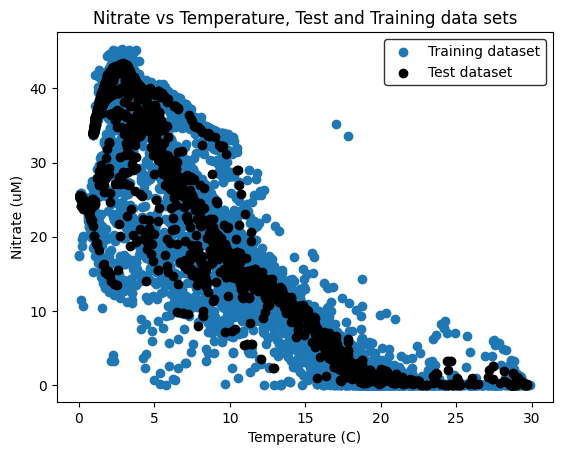

In [29]:
#Plot temperature vs. nitrate predicted
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')
plt.xlabel('Temperature (C)')
plt.ylabel('Nitrate (uM)')
plt.title('Nitrate vs Temperature, Test and Training data sets')
plt.legend(('Training dataset', 'Test dataset'), edgecolor = 'k')


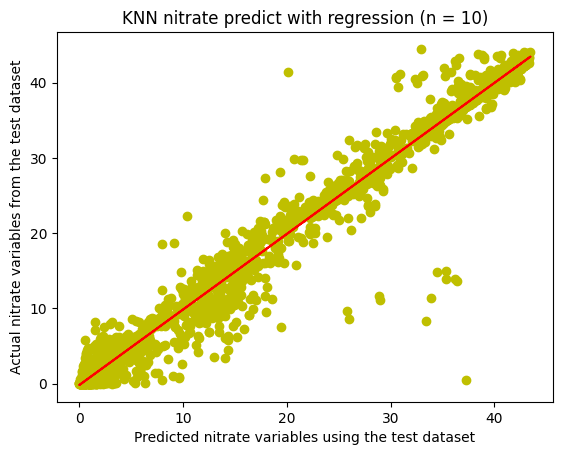

r2 = 0.9999547452391742 

RMSE = 0.10234709500471771 



In [30]:
#Plot predicted nitrate from test compared to actual nitrate from test
#this is using the best fit model decided above
from sklearn.linear_model import LinearRegression
plt.scatter(yfit,y_test,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(yfit, y_test)  # perform linear regression
Y_pred = linear_regressor.predict(yfit)  # make predictions
plt.plot(yfit, Y_pred, color='red')
plt.xlabel("Predicted nitrate variables using the test dataset")
plt.ylabel("Actual nitrate variables from the test dataset")
plt.title("KNN nitrate predict with regression (n = 10)")
plt.show()
r2 = r2_score(yfit, Y_pred)
print("r2 = %s \n" % (r2))
rmse = sqrt(mean_squared_error(yfit, Y_pred))
print("RMSE = %s \n" % (rmse))
#The plot and r2/RMSE values above show that the predicted nitrate values for the test dataset compare well to the actual nitrate values. There are some outliers seen on the graph but the statistics show that the model is a great fit overall on the test dataset.

In [31]:
#File using all of data for training
#nitratefile

infilekuro = 'kuro_BGCargo_noNO3.csv'
nitratefilekuro = pd.read_csv(infilekuro,sep=(','))
X = nitratefilekuro[["SALINITY[PSS]","TEMPERATURE[C]"]]

infilekurowithnitrate = 'kuro_BGCargo_NO3.csv'
realNO3file = pd.read_csv(infilekurowithnitrate,sep=(','))
NO3real = realNO3file[["NITRATE[uMOL/KG]"]]


Here we are filtering the argo data, so that we don't try and predict values that are
below 0. From the argo dataset, we get rid of any nitrate values (and associated temp/salinity values) that are less than 0. Such that our model doesn't try and predict nitrate values that are less than 0.


In [38]:
#Add salinity, temperature, nitrate columns together. Then filter all three based on nitrate>0

Xconcat = pd.concat([X, NO3real], axis=1)
#print Xconcat.shape
NO3filter =  Xconcat['NITRATE[uMOL/KG]']>=0
#print(NO3filter.head())
AllNo3filtered = Xconcat[NO3filter]
X = AllNo3filtered[["SALINITY[PSS]","TEMPERATURE[C]"]]
# Rename the column SALINITY[PSS] to sal
X.rename(columns={'SALINITY[PSS]': 'sal'}, inplace=True)
# Rename the column TEMPERATURE[C] to theta
X.rename(columns={'TEMPERATURE[C]': 'theta'}, inplace=True)
#print X.shape
NO3real = AllNo3filtered[["NITRATE[uMOL/KG]"]]
#print AllNo3filtered.shape
#NO3filter

KeyError: "None of [Index(['SALINITY[PSS]', 'TEMPERATURE[C]'], dtype='object')] are in the [columns]"

In [39]:
#Run best fit model, and display results
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
print ('Neighbors = %s\n' % (10))
    # compute the R^2 score
accuracyscore = model.score(X_train,y_train)
print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
rmse = sqrt(mean_squared_error(y_test, yfit))
print("RMSE = %s \n" % (rmse))



Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.1939401652725508 



In [40]:
#Predict the argo nitrate data using filtered Salinity/Temperature data from the argo dataset
NO3predicted = model.predict(X)
NO3predicted

array([[42.054],
       [41.457],
       [41.446],
       ...,
       [40.26 ],
       [39.383],
       [38.218]])

Plot the predicted nitrate vs the real nitrate

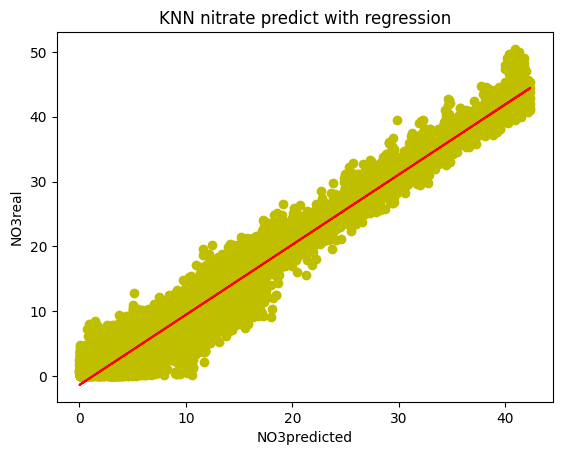

r2 = 0.9541059426388332 

RMSE = 2.562037974512438 



In [41]:
#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
plt.title("KNN nitrate predict with regression")
plt.show()
r2 = r2_score(NO3predicted, NO3real)
print("r2 = %s \n" % (r2))
#text(50, 5, r2, fontsize=12)
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes)

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved,max_iter=500,random_state=4)
        mlp.fit(X_train,y_train)
        trainres = mlp.score(X_train,y_train)
        predictions = mlp.predict(X_test)
        accresults = mlp.score(X_test,y_test)
        res = [nodes,layers,trainres,accresults]
        results.append(res)
    layers_saved=[]
print(results)




/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed w

[[7, 7, 0.9162687294076185, 0.9213543007174791], [7, 8, 0.9157024890919858, 0.9207134615736478], [7, 9, 0.9198097029562033, 0.9250881620892377], [8, 7, 0.8714871377146776, 0.8776441310213711], [8, 8, 0.9197392507654927, 0.9243773039688101], [8, 9, 0.9189544956150362, 0.9237015546806409], [9, 7, 0.9142692845904898, 0.918218149615439], [9, 8, 0.9146041230363336, 0.9187622669459592], [9, 9, 0.9213352586464023, 0.9263302297201945]]


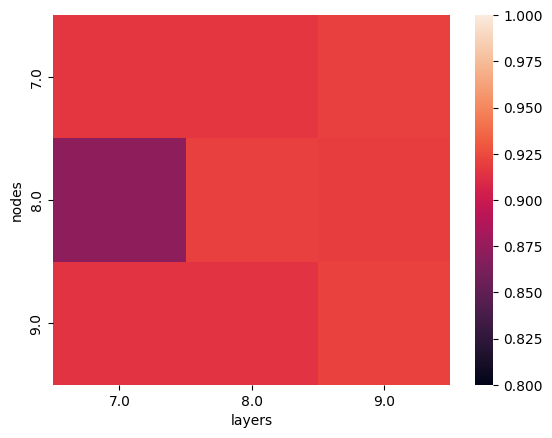

In [43]:
import seaborn as sns
myarray = np.asarray(results)

data = pd.DataFrame({'nodes': myarray[:,0], 'layers': myarray[:,1], 'Z': myarray[:,2]})
data_pivoted = data.pivot(index="nodes", columns="layers", values="Z")
ax = sns.heatmap(data_pivoted,vmin=0.8, vmax=1)
plt.show()

In [44]:
# Create mlpregrssor model with 8 nodes and 8 layers
mlp = MLPRegressor(hidden_layer_sizes=(8,8),max_iter=500,random_state=4)
mlp.fit(X_train,y_train)
trainres = mlp.score(X_train,y_train)
predictions = mlp.predict(X_test)
accresults = mlp.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
predictions

array([41.05937746, 28.95814057, 28.12541968, ..., 14.13978849,
       40.73982516, 40.80273152])

In [46]:
accresults

0.9243773039688101

In [50]:
#Predict the y values from X using the mlp model above
NO3predicted = mlp.predict(X)
#Reshape so that it NO3predicted is 1d array
NO3predicted = NO3predicted.reshape(-1,1)
NO3predicted

array([[40.89292151],
       [40.85710114],
       [40.47737137],
       ...,
       [38.33604452],
       [37.46545578],
       [36.35262978]])

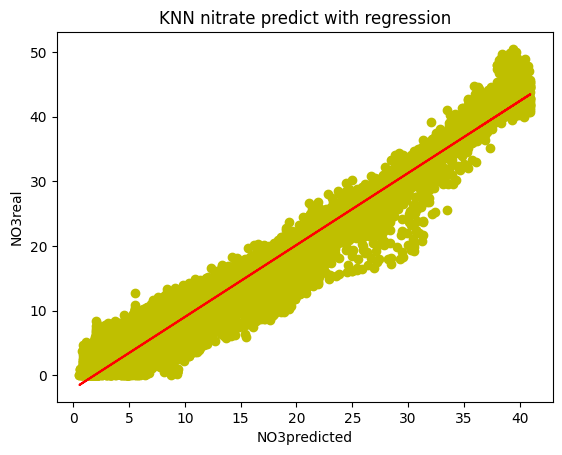

r2 = 0.941117144119898 

RMSE = 2.8221553328275886 



In [51]:
#NO3realfilter = NO3real[NO3real.NITRATE[uMOL/KG]>0]
ax = plt.scatter(NO3predicted,NO3real,color = 'y')
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(NO3predicted, NO3real)  # perform linear regression
Y_pred = linear_regressor.predict(NO3predicted)  # make predictions
plt.plot(NO3predicted, Y_pred, color='red')
plt.xlabel("NO3predicted")
plt.ylabel("NO3real")
plt.title("KNN nitrate predict with regression")
plt.show()
r2 = r2_score(NO3predicted, NO3real)
print("r2 = %s \n" % (r2))
#text(50, 5, r2, fontsize=12)
rmse = sqrt(mean_squared_error(NO3predicted, NO3real))
print("RMSE = %s \n" % (rmse))